## Worshop 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [31]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.3'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [32]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('./../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [33]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [34]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [35]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [36]:
df.columns[df.isnull().sum() > 0]

Index(['workclass', 'occupation', 'native.country'], dtype='object')

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Пропуски могут быть связаны с нежеланием респондентов отвечать, ошибками при сборе данных или отсутствием применимых категорий для некоторых участников. Это типично для данных переписи населения.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [37]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [38]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: >

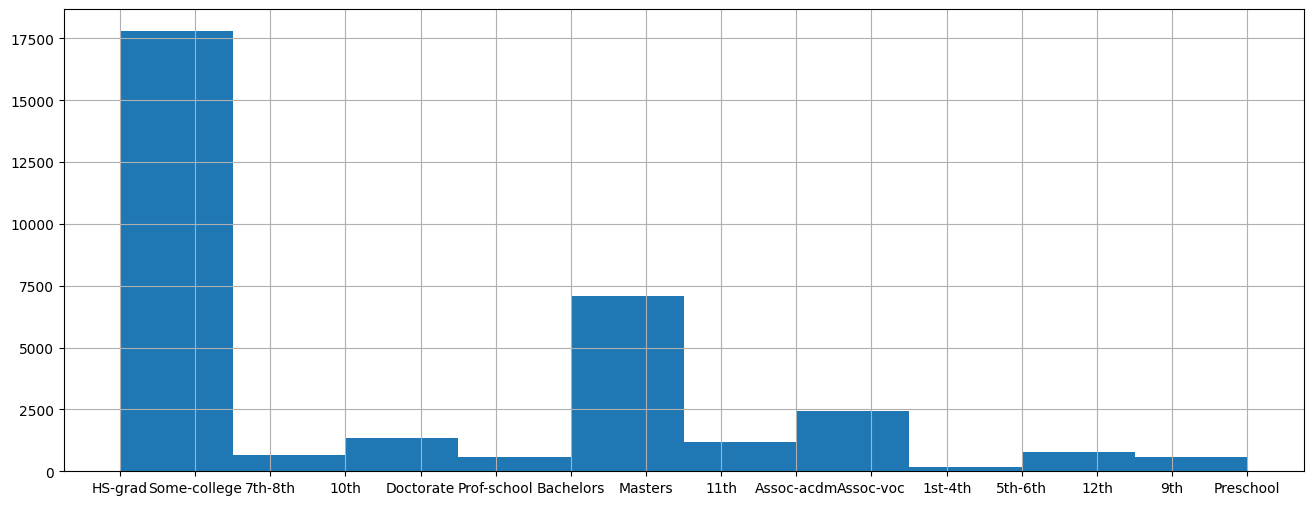

In [39]:
df['education'].hist(figsize=(16,6))

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [40]:
df.groupby('income')['age'].agg(['mean', 'std'])

,mean,std
income,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [41]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
df[df['income'] == '>50K']['education'].isin(higher_education).all()

False

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [42]:
married_mask = df['marital.status'].str.startswith('Married')
single_mask = ~married_mask & (df['sex'] == 'Male')
married_mask = married_mask & (df['sex'] == 'Male')
married_rich_ratio = (df[married_mask & (df['income'] == '>50K')].shape[0] / df[married_mask].shape[0])
single_rich_ratio = (df[single_mask & (df['income'] == '>50K')].shape[0] / df[single_mask].shape[0])

married_rich_ratio, single_rich_ratio

(0.4405139945351156, 0.08449509031397745)

женаты > холостых мужчин

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [43]:
df.groupby(['native.country', 'income'])['hours.per.week'].mean()

native.country  income
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                >50K      45.641026
China           <=50K     37.381818
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours.per.week, Length: 80, dtype: float64

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [44]:
import numpy as np

df['capital_diff'] = np.round(np.sqrt(np.abs(df['capital.gain'] - df['capital.loss'])), 0)
pd.pivot_table(df, values='capital_diff', index='education', columns=pd.cut(df['capital_diff'], bins=10), aggfunc='count')

/tmp/ipykernel_19997/2423923804.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='capital_diff', index='education', columns=pd.cut(df['capital_diff'], bins=10), aggfunc='count')


capital_diff,"(-0.316, 31.6]","(31.6, 63.2]","(63.2, 94.8]","(94.8, 126.4]","(126.4, 158.0]","(158.0, 189.6]","(189.6, 221.2]","(221.2, 252.8]","(252.8, 284.4]","(284.4, 316.0]"
education,,,,,,,,,,
10th,868,52,7,2,1,1,0,0,0,2
11th,1096,55,19,5,0,0,0,0,0,0
12th,406,15,8,3,1,0,0,0,0,0
1st-4th,159,8,1,0,0,0,0,0,0,0
5th-6th,308,19,6,0,0,0,0,0,0,0
7th-8th,583,51,11,1,0,0,0,0,0,0
9th,479,30,4,0,0,0,0,0,0,1
Assoc-acdm,933,78,36,17,1,1,0,0,0,1
Assoc-voc,1198,94,67,19,0,3,0,0,0,1


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [45]:
df[(df['sex'] == 'Female') & (df['income'] == '>50K')]['native.country'].value_counts()

native.country
United-States         1072
Philippines             12
Canada                   9
Germany                  7
England                  6
Japan                    5
Italy                    5
China                    5
Taiwan                   4
South                    3
France                   3
Cuba                     3
Poland                   2
Mexico                   2
Puerto-Rico              2
Portugal                 2
India                    2
Iran                     2
Dominican-Republic       2
Greece                   1
Hong                     1
El-Salvador              1
Nicaragua                1
Laos                     1
Hungary                  1
Vietnam                  1
Yugoslavia               1
Ireland                  1
Thailand                 1
Honduras                 1
Jamaica                  1
Scotland                 1
Haiti                    1
Name: count, dtype: int64

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [46]:
df['magic_salary'] = np.where(df['income'] == '<=50K', np.random.randint(0, 51, size=len(df)), np.random.randint(51, 201, size=len(df)))
df.groupby('education').apply(lambda x: x['magic_salary'].mean() / x['hours.per.week'].mean())

/tmp/ipykernel_19997/932201166.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('education').apply(lambda x: x['magic_salary'].mean() / x['hours.per.week'].mean())


education
10th            0.862569
11th            0.906555
12th            0.911250
1st-4th         0.730356
5th-6th         0.746082
7th-8th         0.810310
9th             0.768243
Assoc-acdm      1.213013
Assoc-voc       1.241540
Bachelors       1.573134
Doctorate       2.166546
HS-grad         1.003673
Masters         1.826916
Preschool       0.578384
Prof-school     2.142036
Some-college    1.153877
dtype: float64